In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load dataset
spoof_dataset = pd.read_csv('../spoof_features.csv')
bonfide_dataset = pd.read_csv('../bonafide_features.csv')

In [3]:
# Add label columns: 0 for spoof, 1 for bonafide
spoof_dataset['label'] = 0
bonfide_dataset['label'] = 1

# Merge the datasets
combined_dataset = pd.concat([spoof_dataset, bonfide_dataset], ignore_index=True)

# Shuffle the dataset (optional but recommended)
dataset = combined_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
# Extract features and labels
X = dataset.iloc[:, :-1]
y = dataset['label']

In [7]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [9]:
# Normalize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [10]:
# First, split into train+val and test (e.g., 80% train+val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Then, split train+val into train and validation (e.g., 75% train, 25% val of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# Now: X_train (60%), X_val (20%), X_test (20%)


In [11]:
# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight='balanced'  # Use balanced class weights
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
                       random_state=42)


Validation Report RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2900
           1       1.00      1.00      1.00      2899

    accuracy                           1.00      5799
   macro avg       1.00      1.00      1.00      5799
weighted avg       1.00      1.00      1.00      5799



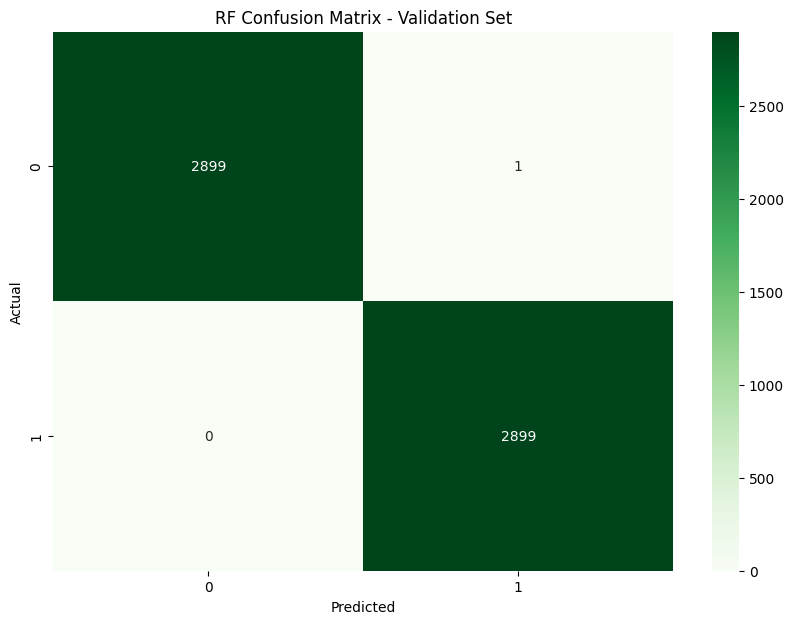

In [12]:
# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Classification Report on Validation
print("\nValidation Report RF:")
print(classification_report(y_val, y_val_pred, target_names=[str(cls) for cls in label_encoder.classes_]))


# Confusion Matrix on Validation
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('RF Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Test Report RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2900
           1       1.00      1.00      1.00      2900

    accuracy                           1.00      5800
   macro avg       1.00      1.00      1.00      5800
weighted avg       1.00      1.00      1.00      5800



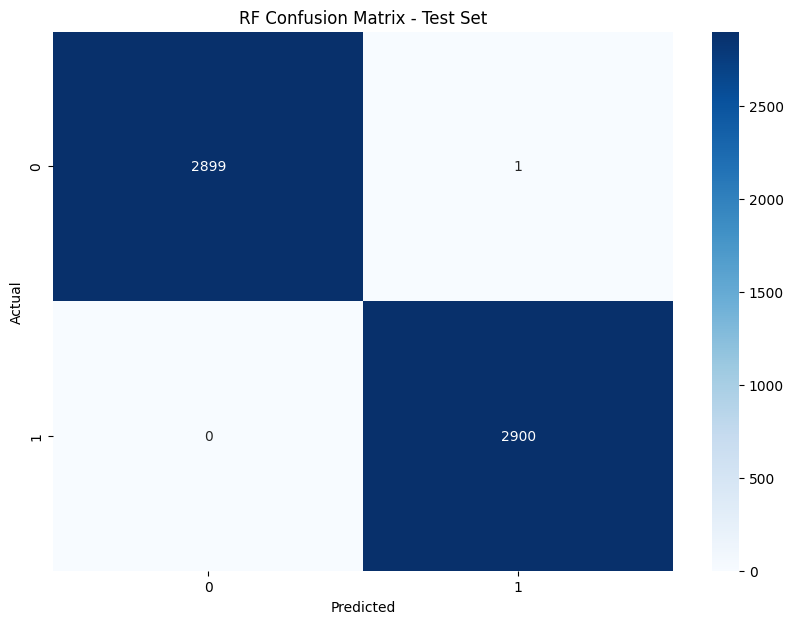

In [13]:
# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Report
print("\nTest Report RF:")
print(classification_report(y_test, y_test_pred, target_names=[str(cls) for cls in label_encoder.classes_]))

# Confusion Matrix on Test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('RF Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
